# Star Wars Survey Data Analysis

In this project, we will analyse survey responses about the Star Wars movie franchise. I am a huge fan of the franchise and want to find out which Star Wars movies are most viewed and best-ranked by the survey respondents. The analysis will also include:
- seeing whether the "original" Star Wars movies (Episode IV, V and VI) are more liked than the newer ones (Episode I, II and III);
- investigating whether IMDB ratings correlate with the ratings of the survey respondents;
- exploring the differences in responses between male and female genders;
- investigating the correlation between whether a respondent considers themselves to be a fan of the franchise and the movie ratings.

The main dataset used for analysis consists of a survey that was done by [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/). Additional information was collected from [IMDB](IMDB.com).

## Reading in the data

First of all, let's use the **pandas** module to read in the data into a dataframe.

In [19]:
# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the dataset using a suitable encoding
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Dealing with missing values

A lot of columns will need to be cleaned first before we can start the analysis. Let's see how many missing values there are in each column.

In [20]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

**RespondentID** is the unique ID of each survey participant. Let's remove the missing values in this column.

In [21]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Converting columns to Boolean values

Our analysis would be much easier if **"Yes/No"** answers in some of the columns were converted to Boolean types. Let's use a mapping dictionary to do this.

In [22]:
# Create a maping dictionary
map_dic = {'Yes': True, 'No': False}

# Convert strings to Boolean values using the dictionary above
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(map_dic)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(map_dic)

# Check the column now has Boolean values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [23]:
# Check the column now has Boolean values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Now let's convert strings to Boolean values in the columns that contain data about which movies a respondent has seen. We will again use mapping dictionaries to do this.

In [24]:
# Create a maping dictionary
movies_to_bool = {'Star Wars: Episode I  The Phantom Menace':True, 'Star Wars: Episode II  Attack of the Clones':True, 'Star Wars: Episode III  Revenge of the Sith':True, 'Star Wars: Episode IV  A New Hope':True, 'Star Wars: Episode V The Empire Strikes Back':True, 'Star Wars: Episode VI Return of the Jedi':True, np.NaN: False}

# Use a 'for' loop to convert several columns to Boolean type at once
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movies_to_bool)
    print(star_wars[c].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


## Renaming the columns

We notice that the above columns correspond to whether the respondent has seen a certain movie in the Star Wars franchise. Since it is unclear which movies they have seen from the column names, let's rename the columns. 

In [25]:
# Create a dictionary with correct names for the columns
movies_rename = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'}

# Rename the columns using the above dictionary
star_wars = star_wars.rename(columns=movies_rename)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now let's rename the columns where survey respondents rank Star Wars movies from their most to least favourite.

In [26]:
# Create a dictionary with new names for the columns

ranking_rename = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rating_1', 'Unnamed: 10':'rating_2', 'Unnamed: 11':'rating_3', 'Unnamed: 12':'rating_4', 'Unnamed: 13':'rating_5', 'Unnamed: 14':'rating_6'}

# Rename the columns using the dictionary
star_wars = star_wars.rename(columns=ranking_rename)

These columns hold numerical data so let's convert them to float type.

In [31]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Check there are now the desired data types in the columns
star_wars.dtypes

RespondentID                                                                                                      float64
Have you seen any of the 6 films in the Star Wars franchise?                                                         bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                              object
seen_1                                                                                                               bool
seen_2                                                                                                               bool
seen_3                                                                                                               bool
seen_4                                                                                                               bool
seen_5                                                                                                               bool
seen_6                  

The **rating** columns are now of numerical type, while the **seen** columns hold Boolean values, as desired. We are ready to start exploring the cleaned dataframe.

## The Analysis

### Mean movie ratings

In [38]:
# Create a new dataframe that holds the mean ratings of each Star Wars Episode
mean_ratings = star_wars.iloc[:, 9:15].mean()
mean_ratings.head(6)

rating_1    3.732934
rating_2    4.087321
rating_3    4.341317
rating_4    3.272727
rating_5    2.513158
rating_6    3.047847
dtype: float64

Text(0.5, 1.0, 'Mean Star Wars Movie Ratings')

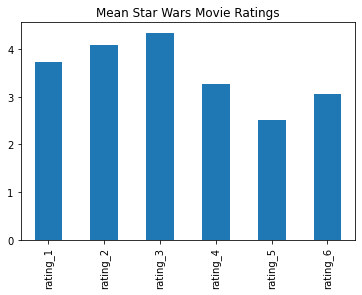

In [39]:
# Plot a bar plot of mean movie ratings
mean_ratings.plot.bar()
plt.title('Mean Star Wars Movie Ratings')

Given that a lower score represents a better rating, we can deduce that **"Star Wars: Episode V Empire Strikes Back" is the favourite Star Wars movie** of the survey respondents, and "Star Wars: Episode III Revenge of the Sith" is the least favourite. Our initial assumption is proven correct, as we observe that the three "original" movies (Episode IV - VI) have better ratings than the newer ones.

### Correlation between IMDB and survey responents' ratings.

In [36]:
# Let's read in the movie rating data from IMDB
imdb = pd.read_csv('imdb.csv')
imdb.head(6)

,Movie,Rating
0,Star Wars: Episode I The Phantom Menace,6.5
1,Star Wars: Episode II Attack of the Clones,6.5
2,Star Wars: Episode III Revenge of the Sith,7.5
3,Star Wars: Episode IV A New Hope,8.6
4,Star Wars: Episode V The Empire Strikes Back,8.7
5,Star Wars: Episode VI Return of the Jedi,8.3


Now let's see whether IMDB ratings correlate with responents' ratings by plotting a scatter plot. But first, let's convert the survey respondents ratings to a conventional ten point scale.

In [60]:
# Write a function to normalise the ratings to a ten-point scale
def normalise(x):
    return ((6-x)/6)*10

# Apply the function to the column of mean ratings
converted_ratings = mean_ratings.apply(normalise)
converted_ratings.head(6)

rating_1    3.778443
rating_2    3.187799
rating_3    2.764471
rating_4    4.545455
rating_5    5.811404
rating_6    4.920255
dtype: float64

Text(0.5, 1.0, 'Star Wars Movies Ratings')

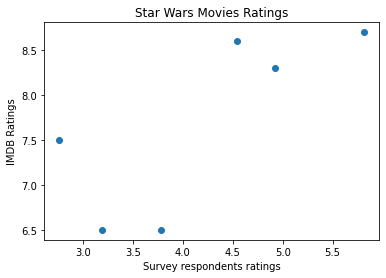

In [113]:
# Plot a scatter plot to visualise the correlation
plt.scatter(y=imdb['Rating'], x=converted_ratings)

#Add axis labels
plt.xlabel('Survey respondents ratings')
plt.ylabel('IMDB Ratings')

# Add the plot title
plt.title('Star Wars Movies Ratings')
#for k, v in imdb.iterrows():
 #   ax.annotate(k, v)

We observe moderate correlation. This suggests that, on average, the Star Wars movies ratings of survey respondents agree with the IMDB ratings.

### Total view counts

Next let's investigate what are the most and least viewed Star Wars movies by survey respondents.

Text(0, 0.5, 'Total Views')

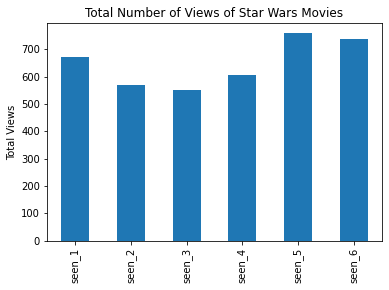

In [160]:
# Plot a bar plot of total views for each movie
star_wars[star_wars.columns[3:9]].sum().plot.bar()

# Add a plot title and axis labels
plt.title('Total Number of Views of Star Wars Movies')
plt.ylabel('Total Views')

Original (the last three) movies have more total views than the newer ones. This reinforces what we saw in the ratings, where the original movies seemed to be more popular.

### Highest Rated Star Wars Movies by Gender

Now let's investigate and compare the Star Wars movies ratings of male and female genders.

In [161]:
# Create a dataframe where the only respondents are men
males = star_wars[star_wars["Gender"] == "Male"]

# Create a similar dataframes with only female respondents
females = star_wars[star_wars["Gender"] == "Female"]

([<matplotlib.axis.YTick at 0x1a26b70310>,
 <a list of 6 Text major ticklabel objects>)

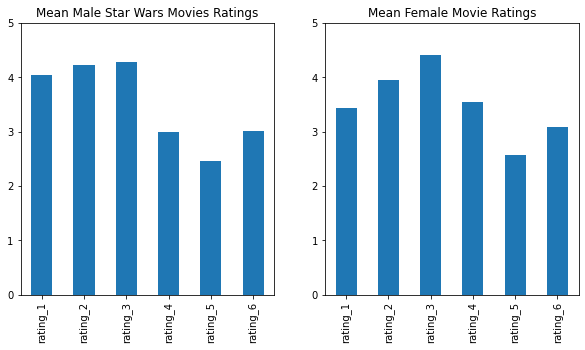

In [191]:
# Set the figure to be of a suitable size
plt.figure(figsize=(10,5))

# Plot the mean male movie ratings
plt.subplot(1,2,1)
males[males.columns[9:15]].mean().plot.bar()
plt.title('Mean Male Star Wars Movies Ratings')
plt.yticks([0,1,2,3,4,5])

# Plot the mean female movie ratings
plt.subplot(1,2,2)
females[females.columns[9:15]].mean().plot.bar()
plt.title('Mean Female Movie Ratings')
plt.yticks([0,1,2,3,4,5])

Remembering that the lower the number, the higher the rating, it is easy too conclude from the bartplots that the "original" movies are preferred to the newer ones by both genders. Both genders' least favourite movie is Episode III. What is interesting, is that for men the difference in the ratings of the newer movies (Episode I-III) is much less subtle than for women, who like Episode I much more than Episode II and III.

### Most viewed Star Wars Movies by Gender

Now let's see what are the most viewed Star Wars movies by gender. To do this, we will use horizontal bar plots, which might make visual comparisons easier.

([<matplotlib.axis.XTick at 0x1a267a4ed0>,
 <a list of 5 Text major ticklabel objects>)

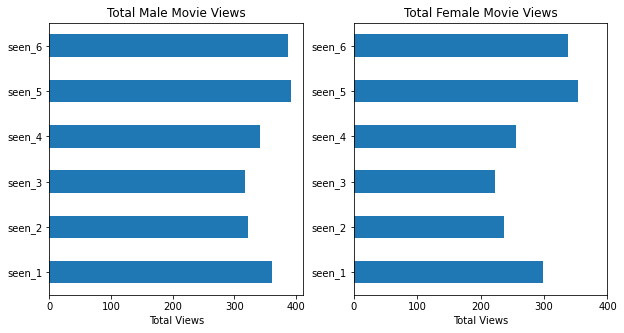

In [192]:
# Set a suitable size for the figure
plt.figure(figsize=(10,5))

# Plot a horizontal bar plot for men
plt.subplot(1,2,1)
males[males.columns[3:9]].sum().plot.barh()
plt.title('Total Male Movie Views')
plt.xlabel('Total Views')

# Plot a horizontal bar plot for women
plt.subplot(1,2,2)
females[females.columns[3:9]].sum().plot.barh()
plt.title('Total Female Movie Views')
plt.xlabel('Total Views')

#Set the x-ticks frequency and limits to be the same for the female and male plots
plt.xlim((0,400))
plt.xticks([0,100,200,300,400])

The most viewed Star Wars movies by men are Episodes V and VI, which is the same for women. The least viewed is Episode 3, which is again true for both genders. We can see that the number of views of every movie in the franchise is higher for male respondents than female respondents. However, for Episodes V and VI, the view count is nearly identical for both genders. One explanation could be that these "original" movies have higher ratings, as we saw before, and hence they are watched by a greater audience.

### Star Wars fans and Movie Rankings

Finally, let's investigate the correlation between a respondent considering themselves a fan and their movie ratings. We will visualise the data by plotting bar plots, as before.

Text(0.5, 1.0, 'Star Wars Fans Mean Movie Ratings')

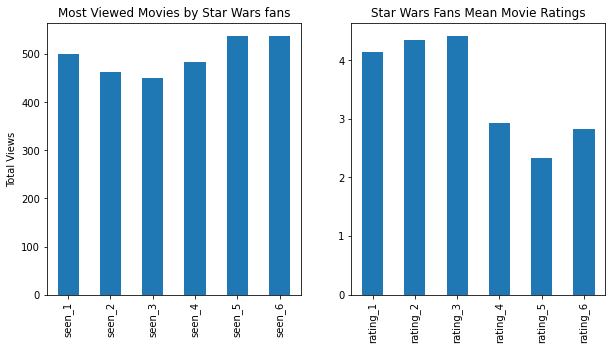

In [204]:
# Firstly, create a dataframe of respondents who consider themselves to be fans of the franchise
star_wars_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

# Create a figure environment for the subplots
plt.figure(figsize=(10,5))

# Plot the total views by Star Wars fans
plt.subplot(1,2,1)
star_wars_fans[star_wars_fans.columns[3:9]].sum().plot.bar()
plt.title('Most Viewed Movies by Star Wars fans')
plt.ylabel('Total Views')

#  Plot the mean ratings of the Star Wars fans
plt.subplot(1,2,2)
star_wars_fans[star_wars_fans.columns[9:15]].mean().plot.bar()
plt.title('Star Wars Fans Mean Movie Ratings')

Our observations agree with the previous findings. Star Wars fans also rate the "original" movies higher and more fans have watched them than the newer movies.

# Conclusion

We can conclude from numerous plots we have generated that **Episode V: The Empire Strikes Back** is the most rated Star Wars movie by the survey respondents. The least rated movie in the franchise is likely **Episode III**. In general the "original" movies are watched more and have higher ratings than the newer movies in the franchise. The ratings also seem to be gender-independent, however male respondents have watched more Star Wars movies than women.